<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Re-inforcement-Learning/blob/main/2348505_Lab9(RL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

TD learning is a class of model-free methods for learning to predict a value function (or state-action value function). One of the most common TD algorithms is **TD(0)**, which updates estimates based on the immediate reward and the estimate of the next state.

In this implementation, I’ll use a simple grid-world environment where an agent needs to learn the values of each state. We’ll use **TD(0)** for this, where the value of a state is updated using the formula:

$$
V(s) \leftarrow V(s) + \alpha \left[ r + \gamma V(s') - V(s) \right]
$$

where:
- $V(s)$ is the current value of state \(s\)
- $r$ is the reward received when transitioning from state \(s\) to state \(s'\)
- $\gamma$ is the discount factor
- $\alpha$ is the learning rate
- $V(s')$ is the value of the next state \(s'\)

---


### 1. Set up the environment

I'll start by defining a simple grid-world environment where the agent can move around. Let's assume a grid of size 4x4.

- **grid_size** defines the size of the grid (4x4).
- **goal_state** is the state where the agent reaches the goal and receives a reward of 1.
- **reward_function** provides a reward of 1 for reaching the goal and -1 for all other states.
- **transition** determines the agent's next state based on its current state and action.

In [2]:
grid_size = 4
goal_state = (3, 3)
start_state = (0, 0)

actions = ['up', 'down', 'left', 'right']

def reward_function(state):
    if state == goal_state:
        return 1
    return -1

def transition(state, action):
    row, col = state
    if action == 'up' and row > 0:
        return (row - 1, col)
    elif action == 'down' and row < grid_size - 1:
        return (row + 1, col)
    elif action == 'left' and col > 0:
        return (row, col - 1)
    elif action == 'right' and col < grid_size - 1:
        return (row, col + 1)
    return state


### 2. Initialize the value function

The agent will maintain a value function for each state in the grid. Initially, we assume all states have a value of 0.

- **V** is a 2D array representing the value of each state in the grid. Initially, all values are set to 0.
- The **plot_value_function** function is used to visualize the value function using `matplotlib`.

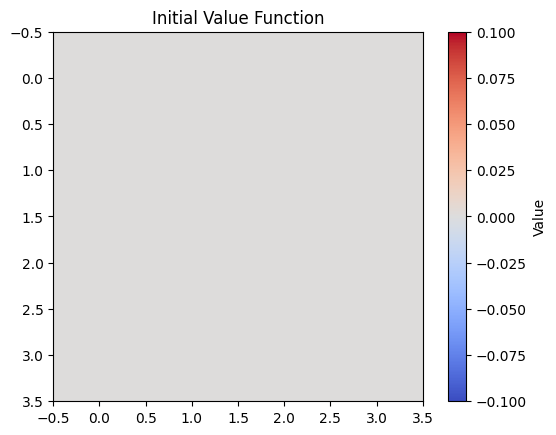

In [3]:
V = np.zeros((grid_size, grid_size))

def plot_value_function(V):
    plt.imshow(V, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label='Value')
    plt.title("Value Function")
    plt.show()

plot_value_function(V)

### 3. Temporal Difference Learning Algorithm (TD(0))

Now we’ll implement the TD(0) algorithm. The agent will explore the environment and update the value function based on the TD update rule.

- The `td_learning` function simulates multiple episodes. In each episode, the agent starts from the start state and randomly chooses actions until it reaches the goal state.
- The TD(0) update rule is applied after each step to update the value function.
- The agent updates the value of the current state based on the immediate reward and the estimated value of the next state.

In [8]:
def td_learning(episodes=1000, alpha=0.1, gamma=0.9):
    global V

    for _ in range(episodes):
        state = start_state
        while state != goal_state:
            action = np.random.choice(actions)

            next_state = transition(state, action)
            reward = reward_function(next_state)

            V[state] += alpha * (reward + gamma * V[next_state] - V[state])

            state = next_state

    return V

V = td_learning(episodes=1000, alpha=0.1, gamma=0.9)

### 4. Visualizing the Results

Once the agent has completed the specified number of episodes, we visualize the updated value function. This helps us understand how the agent has learned to value each state.

The following is the plot after 1000 episodes, showing the value function where higher values are closer to the goal state.

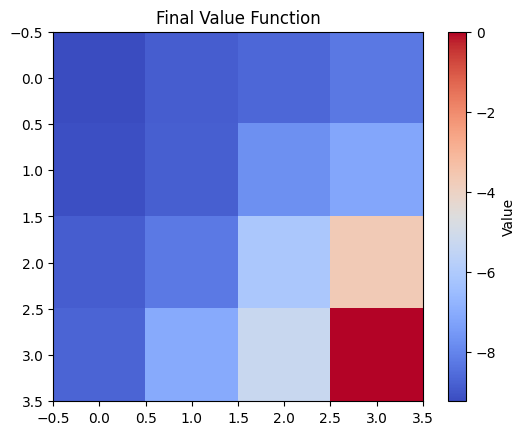

In [12]:
def plot_value_function(V):
    plt.imshow(V, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label='Value')
    plt.title("Final Value Function")
    plt.show()

plot_value_function(V)

### **Conclusion**

In this implementation of Temporal Difference (TD) learning in a grid-world environment, we demonstrated how an agent can learn to estimate the value of each state by interacting with the environment and applying the TD(0) update rule. Over multiple episodes, the agent updates its value estimates for each state based on the immediate reward and the estimated future value of the next state, gradually refining its understanding of the environment. After sufficient learning, the value function converges, with states closer to the goal receiving higher values, reflecting the agent's preference for favorable states. This process highlights the efficiency of TD learning in model-free environments, where the agent learns directly from experience without requiring a model of state transitions. The experiment also shows how learning rate and discount factor parameters influence the agent's learning behavior. TD learning forms the basis for more advanced techniques like Q-learning and can be extended to more complex environments, demonstrating its versatility and importance in reinforcement learning.

---